1. Tugas K-Means

Buatlah sebuah model K-Means dengan ketentuan:

    Gunakan data 'Mall_Customers.csv'
    Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
    Buatlah model K-Means dengan mempertimbangkan jumlah 𝑘 yang terbaik.



Dataset Mall Customers

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Deskripsi Statistik:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41

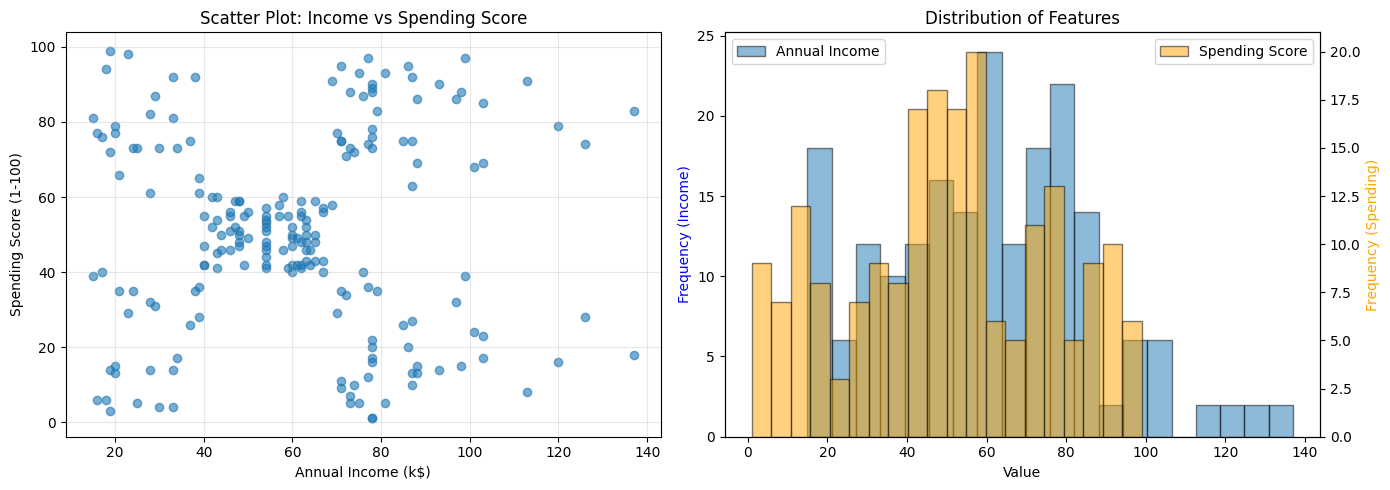


METODE ELBOW - Mencari k Optimal
k=1: inertia=269981.28
k=2: inertia=181363.60
k=3: inertia=106348.37
k=4: inertia=73679.79
k=5: inertia=44448.46
k=6: inertia=37233.81
k=7: inertia=30241.34
k=8: inertia=25036.42
k=9: inertia=21916.79
k=10: inertia=20072.07


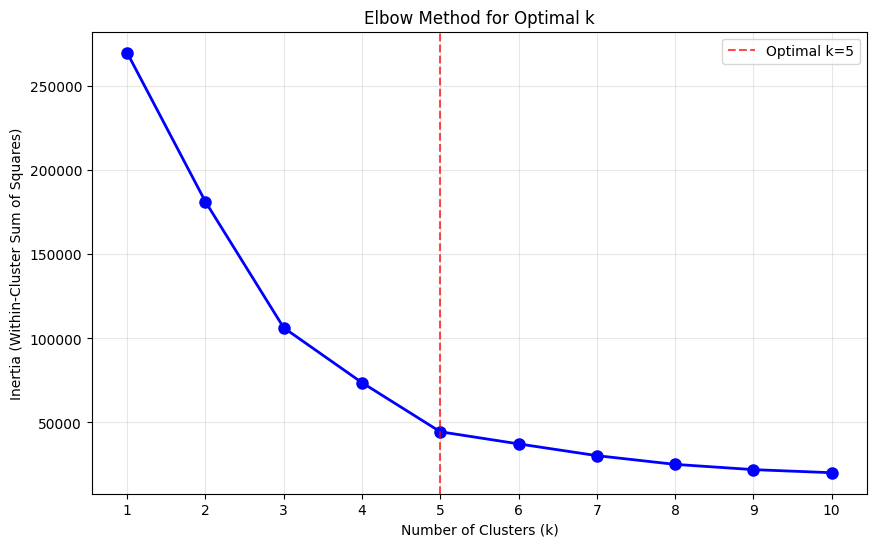


Berdasarkan elbow curve, k optimal adalah 5
Titik elbow terlihat di k=5 dimana penurunan inertia mulai melambat.

K-MEANS CLUSTERING dengan k=5

Jumlah cluster: 5
Inertia: 44448.46

Centroids:
Cluster 0: Income=$55.30k, Spending=49.52
Cluster 1: Income=$86.54k, Spending=82.13
Cluster 2: Income=$25.73k, Spending=79.36
Cluster 3: Income=$88.20k, Spending=17.11
Cluster 4: Income=$26.30k, Spending=20.91

Distribusi pelanggan per cluster:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64
INTERPRETASI CLUSTER


Cluster 0: 81 pelanggan
  Rata-rata Income: $55.30k
  Rata-rata Spending: 49.52
  Segment: Middle Income, Middle Spending (Average Customers)

Cluster 1: 39 pelanggan
  Rata-rata Income: $86.54k
  Rata-rata Spending: 82.13
  Segment: High Income, High Spending (Premium Customers)

Cluster 2: 22 pelanggan
  Rata-rata Income: $25.73k
  Rata-rata Spending: 79.36
  Segment: Low Income, High Spending (Impulse Buyers)

Cluster 3: 35 pelanggan
  Rata-rata Income: $88

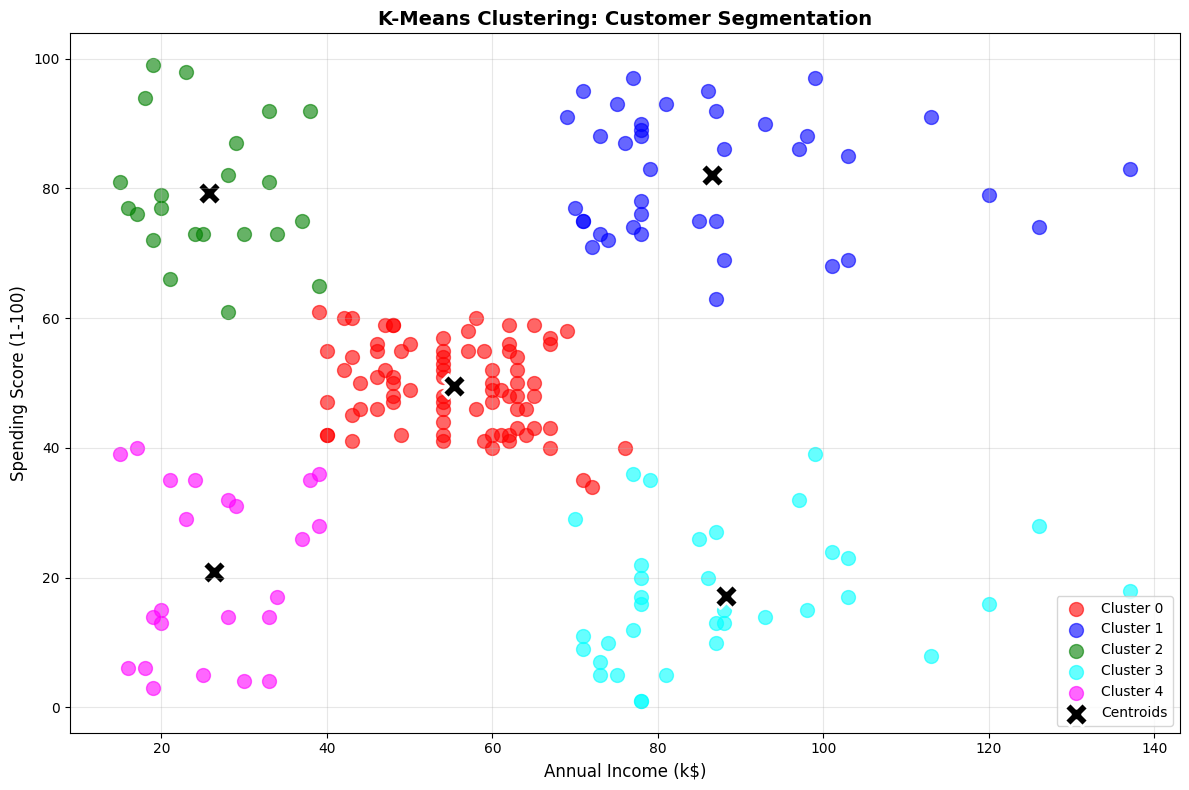

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Load data Mall_Customers.csv
df = pd.read_csv('/content/drive/MyDrive/ML_Dataset/Mall_Customers.csv')

print("Dataset Mall Customers")
print("="*60)
print("\nInformasi Dataset:")
print(df.info())
print("\nDeskripsi Statistik:")
print(df.describe())
print("\nSample Data:")
print(df.head())


# Pilih fitur yang tepat untuk clustering
print("\nMemilih fitur untuk clustering...")
print("Fitur yang dipilih: Annual Income (k$) dan Spending Score (1-100)")
print("\nAlasan pemilihan fitur:")
print("1. Keduanya adalah variabel numerik yang relevan untuk segmentasi pelanggan")
print("2. Age dan Gender kurang relevan untuk pola belanja")
print("3. CustomerID hanya identifier")

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
print(f"\nShape data: {X.shape}")

# Visualisasi distribusi fitur
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.6)
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].set_title('Scatter Plot: Income vs Spending Score')
axes[0].grid(True, alpha=0.3)

# Distribution plots
ax2 = axes[1].twinx()
axes[1].hist(X[:, 0], bins=20, alpha=0.5, label='Annual Income', edgecolor='black')
ax2.hist(X[:, 1], bins=20, alpha=0.5, color='orange', label='Spending Score', edgecolor='black')

axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency (Income)', color='blue')
ax2.set_ylabel('Frequency (Spending)', color='orange')
axes[1].set_title('Distribution of Features')
axes[1].legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


# Gunakan metode elbow untuk menentukan k terbaik
print("\n" + "="*60)
print("METODE ELBOW - Mencari k Optimal")
print("="*60)

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    print(f"k={k}: inertia={kmeans.inertia_:.2f}")

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.axvline(x=5, color='r', linestyle='--', alpha=0.7, label='Optimal k=5')
plt.legend()
plt.show()

print("\nBerdasarkan elbow curve, k optimal adalah 5")
print("Titik elbow terlihat di k=5 dimana penurunan inertia mulai melambat.")


# Buat model K-Means dengan k terbaik

print("\n" + "="*60)
print("K-MEANS CLUSTERING dengan k=5")
print("="*60)
k_optimal = 5
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X)

# Tambahkan cluster labels ke dataframe
df['Cluster'] = cluster_labels

print(f"\nJumlah cluster: {k_optimal}")
print(f"Inertia: {kmeans_final.inertia_:.2f}")

print("\nCentroids:")
for i, centroid in enumerate(kmeans_final.cluster_centers_):
    print(f"Cluster {i}: Income=${centroid[0]:.2f}k, Spending={centroid[1]:.2f}")

print("\nDistribusi pelanggan per cluster:")
print(df['Cluster'].value_counts().sort_index())

# Visualisasi hasil clustering
plt.figure(figsize=(12, 8))

print("="*60)
print("INTERPRETASI CLUSTER")
print("\n" + "="*60)

# Interpretasi cluster
for i in range(k_optimal):
    cluster_df = df[df['Cluster'] == i]
    avg_income = cluster_df['Annual Income (k$)'].mean()
    avg_spending = cluster_df['Spending Score (1-100)'].mean()
    segment = ""

    if avg_income < 40 and avg_spending < 40:
        segment = "Low Income, Low Spending (Careful Shoppers)"
    elif avg_income < 40 and avg_spending > 60:
        segment = "Low Income, High Spending (Impulse Buyers)"
    elif avg_income > 60 and avg_spending < 40:
        segment = "High Income, Low Spending (Savers)"
    elif avg_income > 60 and avg_spending > 60:
        segment = "High Income, High Spending (Premium Customers)"
    else:
        segment = "Middle Income, Middle Spending (Average Customers)"

    print(f"\nCluster {i}: {len(cluster_df)} pelanggan")
    print(f"  Rata-rata Income: ${cluster_df['Annual Income (k$)'].mean():.2f}k")
    print(f"  Rata-rata Spending: {cluster_df['Spending Score (1-100)'].mean():.2f}")
    print(f"  Segment: {segment}")

# Plot clusters
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(k_optimal):
    cluster_data = X[cluster_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1],
                c=colors[i], label=f'Cluster {i}', alpha=0.6, s=100)

plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('K-Means Clustering: Customer Segmentation', fontsize=14, fontweight='bold')

# Plot centroids
plt.scatter(kmeans_final.cluster_centers_[:, 0],
            kmeans_final.cluster_centers_[:, 1],
            c='black', marker='X', s=300, edgecolors='white', linewidths=2,
            label='Centroids')

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


2. Tugas DBSCAN

    Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.
    Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.
    Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.
    Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).
    Lakukan eksperimen:

    
        eps = 0.05, 0.1, 0.3, 0.5
        min_samples = 3, 10, 20
        Catat perubahan klaster, noise, dan kualitas evaluasi.




EXPLORING DBSCAN CLUSTERING

Generating synthetic 'moon-shaped' dataset...
Dataset dimensions: (1000, 2)
Number of data points: 1000
Injected noise level: 0.05 (controls point deviation)

Normalizing the dataset features using StandardScaler...
Data successfully normalized.


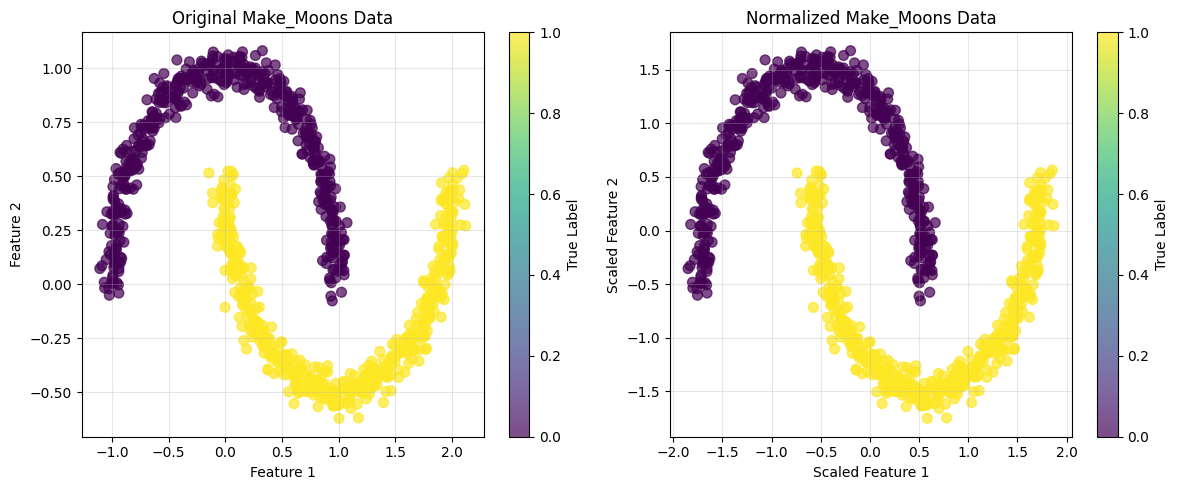


RUNNING DBSCAN: Baseline Configuration (eps=0.2, min_samples=5)

Detected clusters: 2
Identified noise points: 0
Noise percentage: 0.00%
Core samples (cluster centers): 1000
Border samples (edges of clusters): 0

EVALUATING CLUSTERING PERFORMANCE

Homogeneity Score (purity of clusters): 1.0000
Completeness Score (all similar points in same cluster): 1.0000
V-Measure Score (harmonic mean of homogeneity and completeness): 1.0000
Adjusted Rand Index (similarity to ground truth, chance-adjusted): 1.0000
Adjusted Mutual Info (mutual information, chance-adjusted): 1.0000
Silhouette Score (cluster density and separation): 0.3912

Interpretation:
- Higher Homogeneity, Completeness, V-Measure, ARI, AMI indicate better agreement with true labels.
- Higher Silhouette Score (closer to 1) indicates well-separated clusters.

VISUALIZING DBSCAN OUTPUT

Visual key:
- Large, colored markers: Core samples of a cluster
- Small, lighter colored markers: Border samples of a cluster
- Small, black markers:

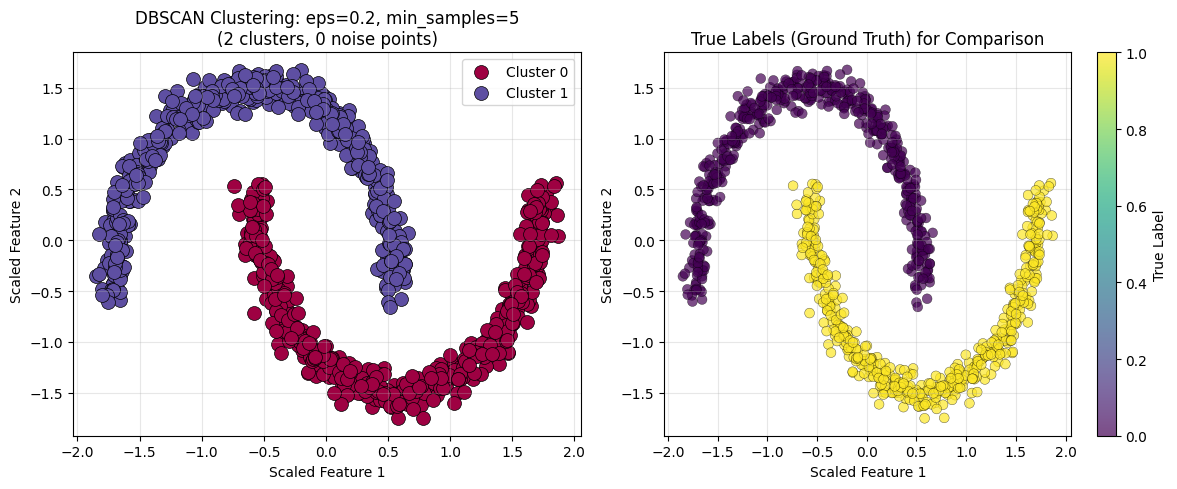


CONDUCTING PARAMETER EXPERIMENTS FOR DBSCAN

Initiating parameter sweep...
  eps=0.05, min_samples= 3 -> clusters=69, noise=186 ( 18.6%), ARI=0.0446, Silhouette=0.3492
  eps=0.05, min_samples= 5 -> clusters=61, noise=386 ( 38.6%), ARI=0.0385, Silhouette=0.5017
  eps=0.05, min_samples=10 -> clusters=3, noise=970 ( 97.0%), ARI=0.0000, Silhouette=0.8807
  eps=0.05, min_samples=20 -> clusters=0, noise=1000 (100.0%), ARI=0.0000, Silhouette=0.0000
  eps=0.10, min_samples= 3 -> clusters=2, noise= 14 (  1.4%), ARI=1.0000, Silhouette=0.3939
  eps=0.10, min_samples= 5 -> clusters=3, noise= 19 (  1.9%), ARI=0.7881, Silhouette=0.3778
  eps=0.10, min_samples=10 -> clusters=7, noise= 57 (  5.7%), ARI=0.5887, Silhouette=0.2097
  eps=0.10, min_samples=20 -> clusters=6, noise=850 ( 85.0%), ARI=0.2451, Silhouette=0.7873
  eps=0.20, min_samples= 3 -> clusters=2, noise=  0 (  0.0%), ARI=1.0000, Silhouette=0.3912
  eps=0.20, min_samples= 5 -> clusters=2, noise=  0 (  0.0%), ARI=1.0000, Silhouette=0.3912
 

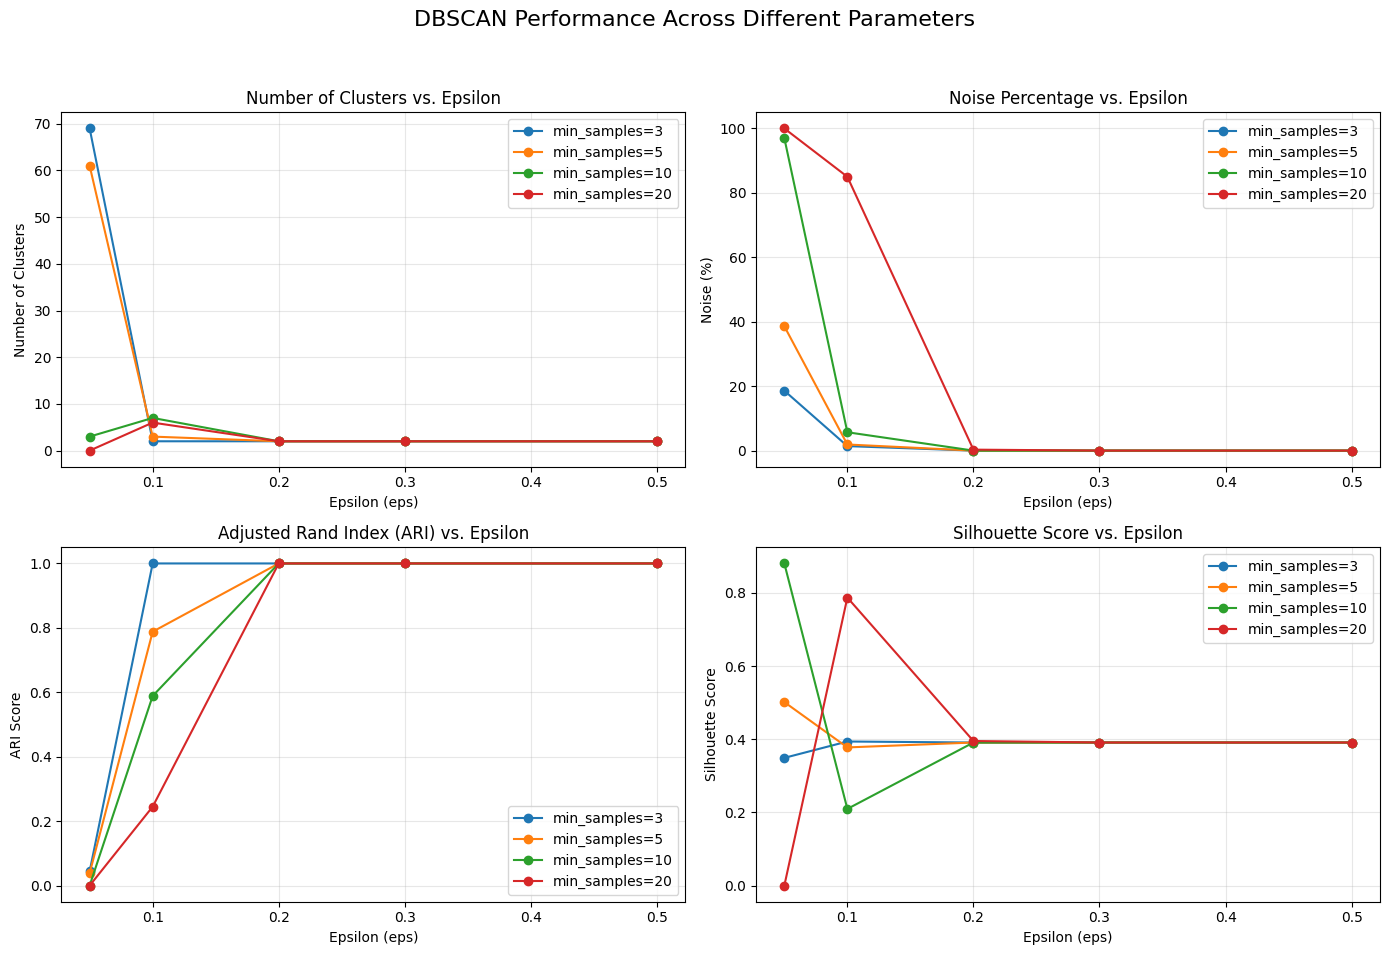

In [6]:
import pandas as pd # Import pandas for data manipulation (though not strictly used in this cell, good practice to keep if used elsewhere)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score


print("\n" + "="*60)
print("EXPLORING DBSCAN CLUSTERING")
print("="*60)

# Data Generation
print("\nGenerating synthetic 'moon-shaped' dataset...")
X_moons, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)
print(f"Dataset dimensions: {X_moons.shape}")
print(f"Number of data points: {len(X_moons)}")
print(f"Injected noise level: 0.05 (controls point deviation)")

# Data Preprocessing (Scaling)
print("\nNormalizing the dataset features using StandardScaler...")
scaler = StandardScaler()
X_moons_scaled = scaler.fit_transform(X_moons)
print("Data successfully normalized.")

# Initial Data Visualization (Original vs. Scaled)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7)
plt.title('Original Make_Moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.colorbar(label='True Label')

plt.subplot(1, 2, 2)
plt.scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7)
plt.title('Normalized Make_Moons Data')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.grid(True, alpha=0.3)
plt.colorbar(label='True Label')
plt.tight_layout()
plt.show()


# DBSCAN Execution with Baseline Parameters
print("\n" + "="*60)
print("RUNNING DBSCAN: Baseline Configuration (eps=0.2, min_samples=5)")
print("="*60)

dbscan = DBSCAN(eps=0.2, min_samples=5)
cluster_labels_db = dbscan.fit_predict(X_moons_scaled)

# Analyzing DBSCAN Results
n_clusters = len(set(cluster_labels_db)) - (1 if -1 in cluster_labels_db else 0)
n_noise = list(cluster_labels_db).count(-1)

core_samples_mask = np.zeros_like(cluster_labels_db, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
n_core = core_samples_mask.sum()
n_border = len(X_moons_scaled) - n_core - n_noise

print(f"\nDetected clusters: {n_clusters}")
print(f"Identified noise points: {n_noise}")
print(f"Noise percentage: {n_noise/len(X_moons_scaled)*100:.2f}%")
print(f"Core samples (cluster centers): {n_core}")
print(f"Border samples (edges of clusters): {n_border}")


# Performance Evaluation Metrics
print("\n" + "="*60)
print("EVALUATING CLUSTERING PERFORMANCE")
print("="*60)

# Metrics are calculated only for non-noise points that are assigned to a cluster
mask = cluster_labels_db != -1

if mask.sum() > 0 and n_clusters >= 2:
    homogeneity = homogeneity_score(y_true[mask], cluster_labels_db[mask])
    completeness = completeness_score(y_true[mask], cluster_labels_db[mask])
    v_measure = v_measure_score(y_true[mask], cluster_labels_db[mask])
    ari = adjusted_rand_score(y_true[mask], cluster_labels_db[mask])
    ami = adjusted_mutual_info_score(y_true[mask], cluster_labels_db[mask])
    silhouette = silhouette_score(X_moons_scaled[mask], cluster_labels_db[mask])

    print(f"\nHomogeneity Score (purity of clusters): {homogeneity:.4f}")
    print(f"Completeness Score (all similar points in same cluster): {completeness:.4f}")
    print(f"V-Measure Score (harmonic mean of homogeneity and completeness): {v_measure:.4f}")
    print(f"Adjusted Rand Index (similarity to ground truth, chance-adjusted): {ari:.4f}")
    print(f"Adjusted Mutual Info (mutual information, chance-adjusted): {ami:.4f}")
    print(f"Silhouette Score (cluster density and separation): {silhouette:.4f}")
    print("\nInterpretation:")
    print("- Higher Homogeneity, Completeness, V-Measure, ARI, AMI indicate better agreement with true labels.")
    print("- Higher Silhouette Score (closer to 1) indicates well-separated clusters.")
elif n_clusters < 2 and mask.sum() > 0:
    print("\nCannot compute Silhouette Score (requires at least 2 clusters).")
    homogeneity = homogeneity_score(y_true[mask], cluster_labels_db[mask])
    completeness = completeness_score(y_true[mask], cluster_labels_db[mask])
    v_measure = v_measure_score(y_true[mask], cluster_labels_db[mask])
    ari = adjusted_rand_score(y_true[mask], cluster_labels_db[mask])
    ami = adjusted_mutual_info_score(y_true[mask], cluster_labels_db[mask])
    print(f"\nHomogeneity Score (purity of clusters): {homogeneity:.4f}")
    print(f"Completeness Score (all similar points in same cluster): {completeness:.4f}")
    print(f"V-Measure Score (harmonic mean of homogeneity and completeness): {v_measure:.4f}")
    print(f"Adjusted Rand Index (similarity to ground truth, chance-adjusted): {ari:.4f}")
    print(f"Adjusted Mutual Info (mutual information, chance-adjusted): {ami:.4f}")
else:
    print("\nNo valid clusters found or all points are noise. Cannot compute metrics.")


# Visualizing DBSCAN Clustering Results
print("\n" + "="*60)
print("VISUALIZING DBSCAN OUTPUT")
print("="*60)
print("\nVisual key:")
print("- Large, colored markers: Core samples of a cluster")
print("- Small, lighter colored markers: Border samples of a cluster")
print("- Small, black markers: Noise points (outliers)")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
unique_labels = set(cluster_labels_db)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise points are black
        col = [0, 0, 0, 1]

    class_member_mask = (cluster_labels_db == k)

    # Plot core samples
    xy_core = X_moons_scaled[class_member_mask & core_samples_mask]
    plt.scatter(xy_core[:, 0], xy_core[:, 1],
                c=[col], s=100, marker='o',
                edgecolors='k', linewidths=0.5,
                label=f'Cluster {k}' if k != -1 else 'Noise')

    # Plot border samples (non-core members of a cluster)
    xy_border = X_moons_scaled[class_member_mask & ~core_samples_mask]
    plt.scatter(xy_border[:, 0], xy_border[:, 1],
                c=[col], s=20, marker='o',
                edgecolors='k', linewidths=0.3)

plt.title(f'DBSCAN Clustering: eps={dbscan.eps}, min_samples={dbscan.min_samples}\n({n_clusters} clusters, {n_noise} noise points)')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.grid(True, alpha=0.3)
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1],
            c=y_true, cmap='viridis', s=50, alpha=0.7, edgecolors='k', linewidths=0.3)
plt.title('True Labels (Ground Truth) for Comparison')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.grid(True, alpha=0.3)
plt.colorbar(label='True Label')

plt.tight_layout()
plt.show()


# Experimentation with DBSCAN Parameters
print("\n" + "="*60)
print("CONDUCTING PARAMETER EXPERIMENTS FOR DBSCAN")
print("="*60)

# Define parameter ranges for the experiment
eps_values = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_values = [3, 5, 10, 20]

experiment_results = []

print("\nInitiating parameter sweep...")
for eps in eps_values:
    for min_samples in min_samples_values:
        # Run DBSCAN with current parameters
        dbscan_exp = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan_exp.fit_predict(X_moons_scaled)

        # Calculate metrics for the current run
        n_clusters_exp = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_exp = list(labels).count(-1)

        mask_exp = labels != -1
        ari_exp = 0.0
        silhouette_exp = 0.0

        if mask_exp.sum() > 0 and n_clusters_exp >= 2:
            ari_exp = adjusted_rand_score(y_true[mask_exp], labels[mask_exp])
            silhouette_exp = silhouette_score(X_moons_scaled[mask_exp], labels[mask_exp])
        elif mask_exp.sum() > 0 and n_clusters_exp < 2:
            ari_exp = adjusted_rand_score(y_true[mask_exp], labels[mask_exp]) # ARI can be calculated even with 1 cluster

        # Store results
        experiment_results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters_exp,
            'n_noise': n_noise_exp,
            'noise_pct': n_noise_exp/len(X_moons_scaled)*100,
            'ARI': ari_exp,
            'Silhouette': silhouette_exp
        })

        print(f"  eps={eps:.2f}, min_samples={min_samples:2d} -> "
              f"clusters={n_clusters_exp}, noise={n_noise_exp:3d} ({n_noise_exp/len(X_moons_scaled)*100:5.1f}%), "
              f"ARI={ari_exp:.4f}, Silhouette={silhouette_exp:.4f}")

# Presenting Experiment Results
df_exp = pd.DataFrame(experiment_results)

print("\n" + "="*60)
print("SUMMARY OF EXPERIMENTAL RESULTS")
print("="*60)
print(df_exp.to_string(index=False))

# Identifying the best parameter combination based on ARI
best_result = df_exp.loc[df_exp['ARI'].idxmax()]

print("\n" + "="*60)
print("OPTIMAL PARAMETERS (BASED ON ADJUSTED RAND INDEX):")
print("="*60)
print(f"Best eps:         {best_result['eps']}")
print(f"Best min_samples: {best_result['min_samples']:.0f}")
print(f"Resulting clusters: {best_result['n_clusters']:.0f}")
print(f"Resulting noise points: {best_result['n_noise']:.0f} ({best_result['noise_pct']:.2f}%)")
print(f"Achieved ARI:     {best_result['ARI']:.4f}")
print(f"Achieved Silhouette: {best_result['Silhouette']:.4f}")

print("\n" + "="*60)
print("OBSERVATIONS ON PARAMETER IMPACT")
print("="*60)
print("- Effect of 'eps' (neighborhood radius):")
print("  - Too small (e.g., 0.05): Points are too isolated, leading to many noise points and fragmented clusters.")
print("  - Optimal (e.g., 0.1-0.2 for this dataset): Allows proper density estimation, forming clear clusters with minimal noise.")
print("  - Too large (e.g., 0.5): Connects too many points, often resulting in a single large cluster, losing fine-grained structure.")
print("- Effect of 'min_samples' (minimum points for a core point):")
print("  - Small (e.g., 3): Makes DBSCAN more sensitive to noise, potentially forming many small, spurious clusters.")
print("  - Moderate (e.g., 5-10): Strikes a good balance, requiring sufficient density to form a cluster.")
print("  - Large (e.g., 20): Makes the algorithm more robust to noise but might classify border points as noise, or merge distinct clusters.")
print("\nConclusion: Finding the best parameters involves balancing cluster coherence, noise identification, and alignment with the underlying data structure. The ARI helps quantify this balance against known ground truth.")


# Visualizing Parameter Impact on Metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('DBSCAN Performance Across Different Parameters', fontsize=16)

# Plot 1: Number of Clusters vs eps
for ms in min_samples_values:
    df_subset = df_exp[df_exp['min_samples'] == ms]
    axes[0, 0].plot(df_subset['eps'], df_subset['n_clusters'], marker='o', label=f'min_samples={ms}')
axes[0, 0].set_title('Number of Clusters vs. Epsilon')
axes[0, 0].set_xlabel('Epsilon (eps)')
axes[0, 0].set_ylabel('Number of Clusters')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Plot 2: Noise Percentage vs eps
for ms in min_samples_values:
    df_subset = df_exp[df_exp['min_samples'] == ms]
    axes[0, 1].plot(df_subset['eps'], df_subset['noise_pct'], marker='o', label=f'min_samples={ms}')
axes[0, 1].set_title('Noise Percentage vs. Epsilon')
axes[0, 1].set_xlabel('Epsilon (eps)')
axes[0, 1].set_ylabel('Noise (%)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Plot 3: ARI vs eps
for ms in min_samples_values:
    df_subset = df_exp[df_exp['min_samples'] == ms]
    axes[1, 0].plot(df_subset['eps'], df_subset['ARI'], marker='o', label=f'min_samples={ms}')
axes[1, 0].set_title('Adjusted Rand Index (ARI) vs. Epsilon')
axes[1, 0].set_xlabel('Epsilon (eps)')
axes[1, 0].set_ylabel('ARI Score')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# Plot 4: Silhouette vs eps
for ms in min_samples_values:
    df_subset = df_exp[df_exp['min_samples'] == ms]
    axes[1, 1].plot(df_subset['eps'], df_subset['Silhouette'], marker='o', label=f'min_samples={ms}')
axes[1, 1].set_title('Silhouette Score vs. Epsilon')
axes[1, 1].set_xlabel('Epsilon (eps)')
axes[1, 1].set_ylabel('Silhouette Score')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()